In [1]:
from fastai.vision import *
from fastai import *
from ipywidgets import *
from gradcam import *

# DeepFake-Buster !

Show me a picture of a face that you think might be fake and I'll tell you what I think of it !

In [2]:
path = Path()

In [3]:
learn_inf = load_learner(path,'app.pkl')

In [4]:
btn_upload = widgets.FileUpload()
btn_run = widgets.Button(description='Show Grad-CAM')
out_pl = widgets.Output()
lbl_pred = widgets.Label()

In [5]:
def on_click(change):
    img = open_image(io.BytesIO(btn_upload.data[-1]))
    out_pl.clear_output()
    with out_pl: display(img.resize((3,256,256)))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'I\'m {100*probs[pred_idx]:.02f}% sure that this image is {pred} !'

In [6]:
def on_click_grad_cam(change):
    img = open_image(io.BytesIO(btn_upload.data[-1]))
    target_layer = learn_inf.model._bn1
    gcam = GradCam.from_one_img(learn_inf,target_layer, img)
    out_pl.clear_output()
    with out_pl: show_heatmap(gcam.hmap1, img, img.shape[-1])
        
btn_run.on_click(on_click_grad_cam)

In [7]:
btn_upload.observe(on_click, names=['data'])

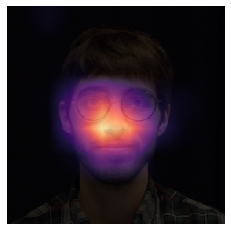

In [8]:
display(VBox([widgets.Label('Select your image!'), btn_upload, out_pl, lbl_pred, btn_run]))